In [1]:
# pip install numba --upgrade
# pip install pygraphviz
import sys
sys.path.insert(0, "/home/ubuntu/git/aiclass/1732095003_hyunkyolim/")
#sys.path.insert(0, "C:\\Users\\admin\\git\\aiclass\\0.Professor\\")

import tensorflux.graph as tfg
import tensorflux.CNN as tfn
import tensorflux.enums as tfe
import datasource.mnist as mnist
import tensorflux.functions as tff
import math
import numba
print(numba.__version__)
%matplotlib inline

0.33.0


In [2]:
"""
    (conv0 - batch_normal0 - relu0 - dropout0) - pool1 - 
    (conv2 - batch_normal2 - relu2 - dropout2) - pool3 - reshape -
    (affine4 - batch_normal4 - relu4 - dropout4) - affine5 - softmax (output)
"""

input_dim = (1, 28, 28)
cnn_param_list = [
    {'type': 'conv', 'filter_num': 3, 'filter_h': 3, 'filter_w': 3, 'pad': 1, 'stride': 1},
    {'type': 'pooling', 'filter_h': 2, 'filter_w': 2, 'stride': 2},
    {'type': 'conv', 'filter_num': 3, 'filter_h': 3, 'filter_w': 3, 'pad': 1, 'stride': 1},
    {'type': 'pooling', 'filter_h': 2, 'filter_w': 2, 'stride': 2},
]
fc_hidden_size = 64
output_size = 10

dropout_ratio0 = 0.5
dropout_ratio2 = 0.5
dropout_ratio4 = 0.5

x = tfg.Placeholder(name="x")
target = tfg.Placeholder(name="target")

n = tfn.CNN(
    input_dim=input_dim,
    cnn_param_list=cnn_param_list,
    fc_hidden_size=fc_hidden_size,
    output_size=output_size,
    input_node=x,
    target_node=target,
    use_batch_normalization=True,
    conv_initializer=tfe.Initializer.Conv_Xavier_Normal.value,
    initializer=tfe.Initializer.Normal.value,
    init_sd=0.01,
    # initializer=tfe.Initializer.Xavier.value,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Adam.value,
    learning_rate=0.001
)

Convolutional Neural Network Model - ID: T2OC1UCC
Data Size: (1, 28, 28)
         |
[Convolution Layer 0]
Param Key: W0, Shape: (3, 1, 3, 3)
Param Key: b0, Shape: (3,)
Data Size: (3, 28, 28)
         |
[Batch Normalization 0]
Param Key: gamma0, Shape: (1, 1)
Param Key: beta0, Shape: (1, 1)
Data Size: (3, 28, 28)
         |
[Activation Layer 0]
Data Size: (3, 28, 28)
         |
[Pooling Layer 1]
Data Size: (3, 14, 14)
         |
[Convolution Layer 2]
Param Key: W2, Shape: (3, 3, 3, 3)
Param Key: b2, Shape: (3,)
Data Size: (3, 14, 14)
         |
[Batch Normalization 2]
Param Key: gamma2, Shape: (1, 1)
Param Key: beta2, Shape: (1, 1)
Data Size: (3, 14, 14)
         |
[Activation Layer 2]
Data Size: (3, 14, 14)
         |
[Pooling Layer 3]
Data Size: (3, 7, 7)
         |
[Reshape Layer]
Data Size: 147
         |
[Affine Layer 4]
Param Key: W4, Shape: (147, 64)
Param Key: b4, Shape: (64,)
Data Size: 64
         |
[Batch Normalization 4]
Param Key: gamma4, Shape: (1, 1)
Param Key: beta4, Sha

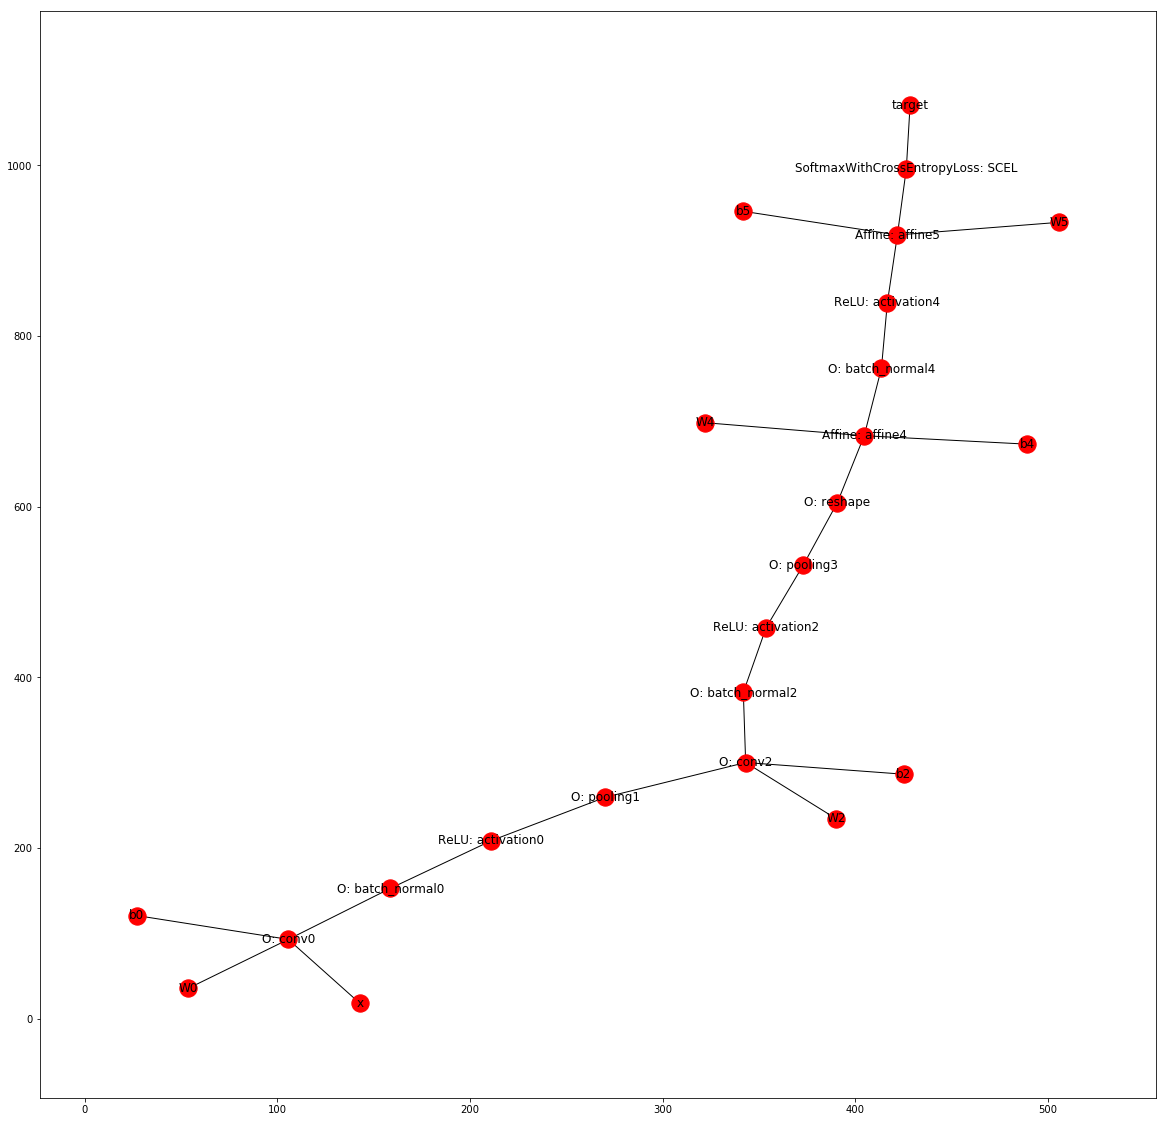

In [3]:
n.draw_and_show(figsize=(20, 20))

[Convolution Layer 0]
(3, 3)
(3, 3)
(3, 3)


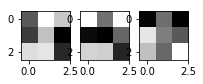

[Convolution Layer 2]
(3, 3, 3)
(3, 3, 3)
(3, 3, 3)


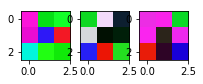

In [4]:
n.draw_filters(figsize=(20, 5))

In [5]:
data = mnist.MNIST_Data(validation_size=5000, n_splits=12, is_onehot_target=True, cnn=True)
#data = mnist.Fashion_MNIST_Data(validation_size=5000, n_splits=12, is_onehot_target=True, cnn=True)

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


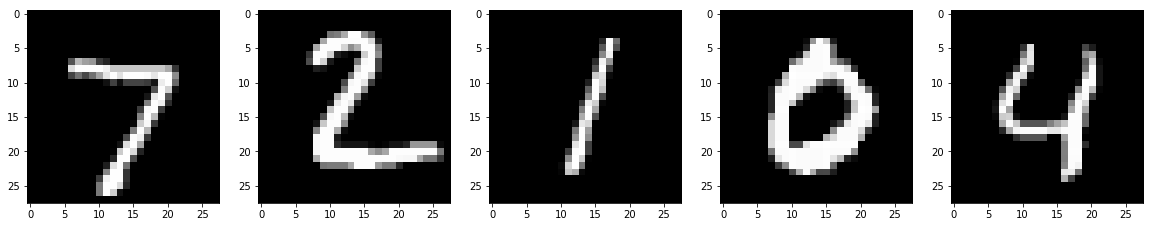

[Convolution Layer: conv0]
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)


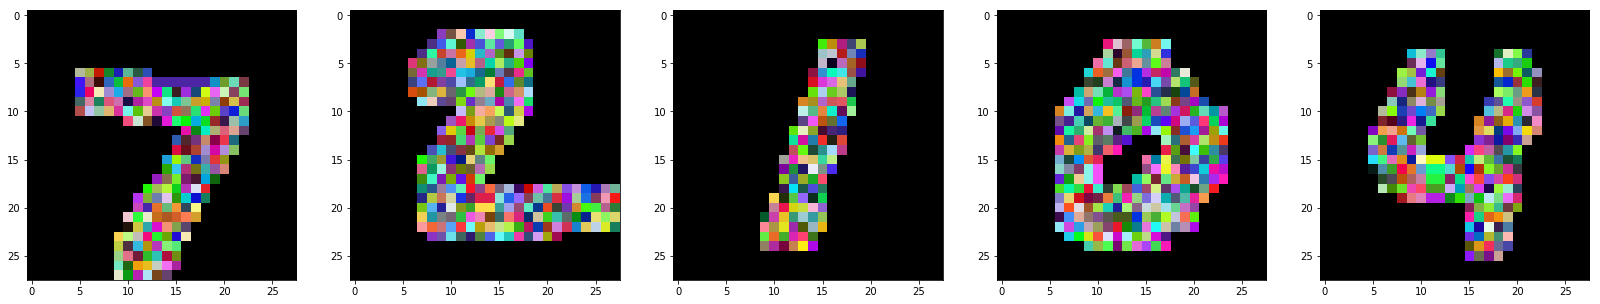

[Activation Layer: activation0]
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)


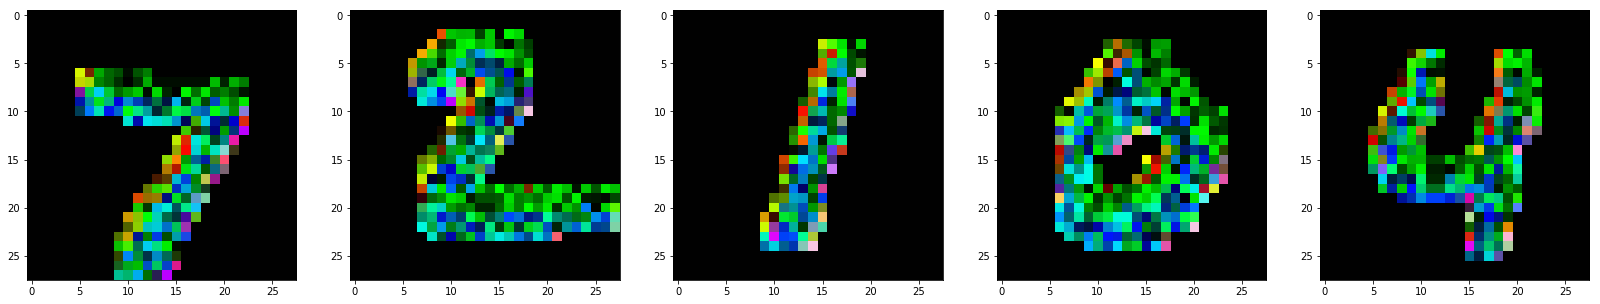

[Pooling Layer: pooling1]
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)


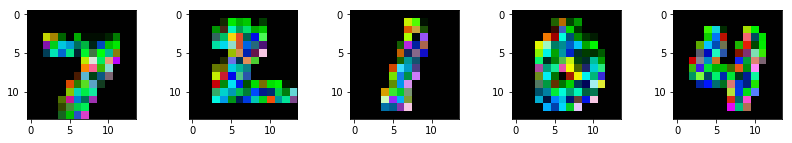

[Convolution Layer: conv2]
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)


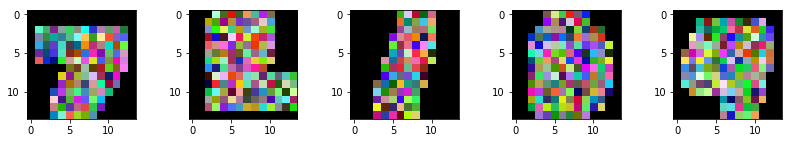

[Activation Layer: activation2]
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)


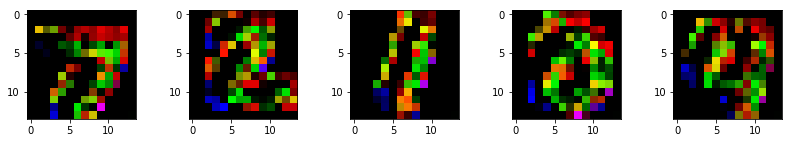

[Pooling Layer: pooling3]
(7, 7, 3)
(7, 7, 3)
(7, 7, 3)
(7, 7, 3)
(7, 7, 3)


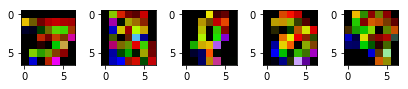

[Pooling Layer: reshape]
(1, 147)
(1, 147)
(1, 147)
(1, 147)
(1, 147)


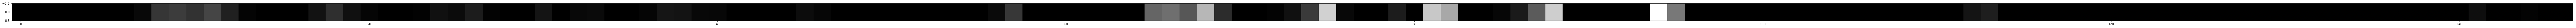

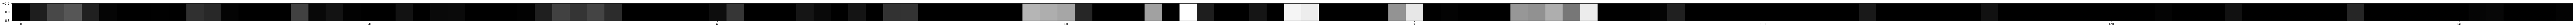

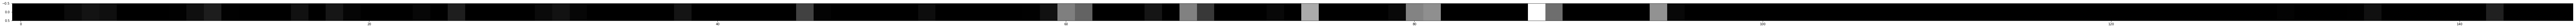

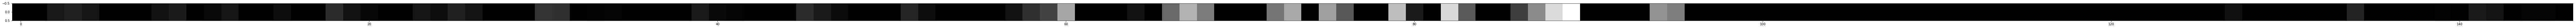

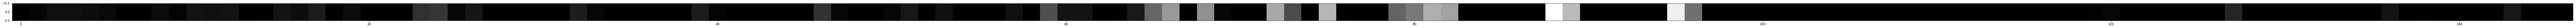

[Affine Layer: affine4]
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)


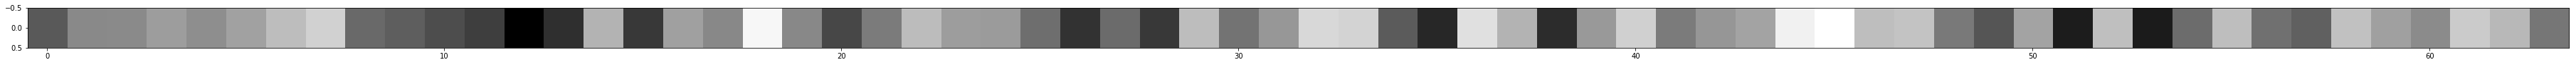

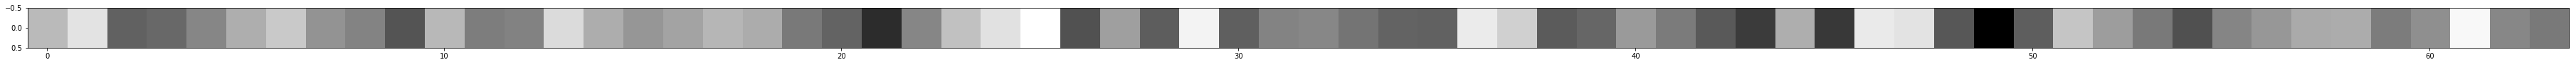

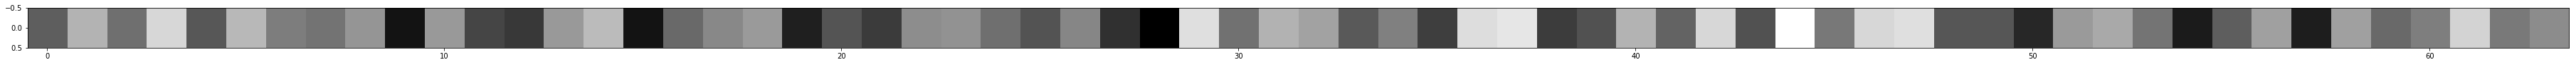

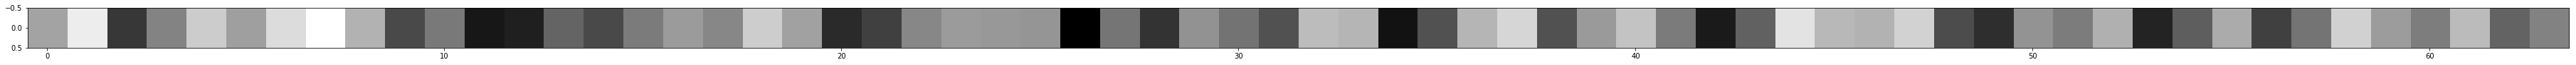

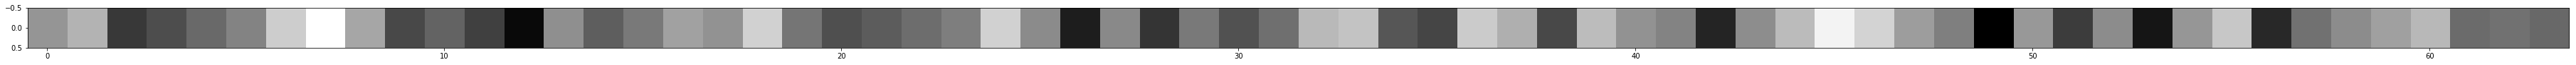

[Affine Layer: affine5]
(1, 10)
(1, 10)
(1, 10)
(1, 10)
(1, 10)


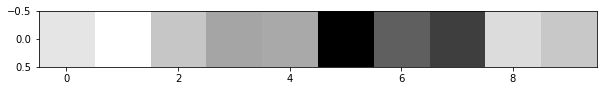

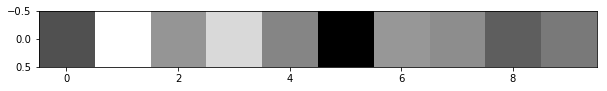

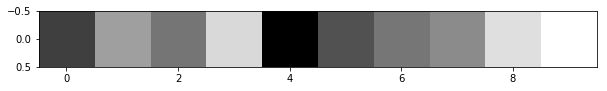

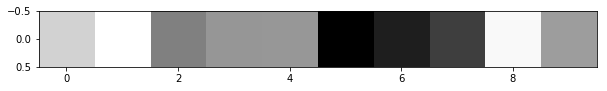

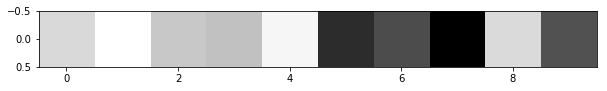

[Softmax Layer]
(1, 10) : [[  6.706e-08   1.000e+00   3.294e-16   3.260e-25   2.844e-24   3.244e-70
    2.774e-44   2.643e-53   1.885e-10   1.041e-15]]
(1, 10) : [[  1.577e-27   1.000e+00   4.858e-17   1.177e-06   2.090e-19   6.430e-40
    1.049e-16   3.205e-18   1.893e-25   4.091e-21]]
(1, 10) : [[  1.839e-32   1.187e-16   1.457e-23   4.199e-07   6.271e-43   1.570e-29
    2.007e-23   5.689e-20   4.579e-06   1.000e+00]]
(1, 10) : [[  2.088e-14   9.886e-01   2.422e-39   1.070e-32   1.832e-32   3.665e-78
    4.996e-69   2.227e-59   1.139e-02   1.361e-30]]
(1, 10) : [[  1.327e-08   9.883e-01   5.248e-12   2.122e-13   1.167e-02   1.871e-43
    4.074e-37   1.280e-52   2.233e-08   4.497e-36]]


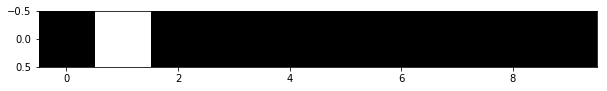

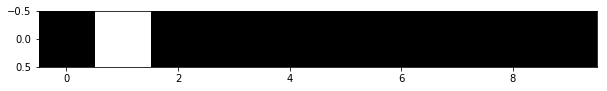

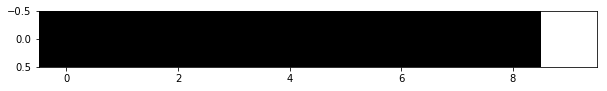

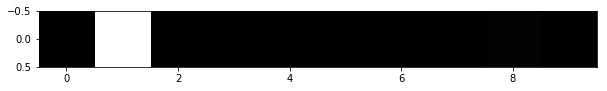

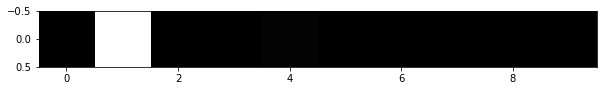

In [6]:
n.draw_filtered_images(test_inputs=data.test_input[:5], figsize=(20, 5))

In [7]:
forward_final_output = n.feed_forward(input_data=data.test_input, is_numba=False)
#print(forward_final_output.shape)
print("Initial Accuracy", tff.accuracy(forward_final_output, data.test_target))

batch_size = 1000
#%timeit -n1 -r1 n.learning(
n.learning(
    max_epoch=10, 
    data=data, 
    batch_size=batch_size, 
    print_period=1, 
    is_numba=False, 
    verbose=False
)
data.reset_kfold()

forward_final_output = n.feed_forward(input_data=data.test_input, is_numba=False)
print("Post-learning Accuracy", tff.accuracy(forward_final_output, data.test_target))

Initial Accuracy 0.0999
-- Learning Started --
Epoch   0 Completed - Train Error:2.30294 - Validation Error:2.30380 - Test Accuracy:0.08880 <== Minimal Val. Error
Fold:  0
Epoch   1 Completed - Train Error:2.30212 - Validation Error:2.30158 - Test Accuracy:0.11350 <== Minimal Val. Error
Epoch   2 Completed - Train Error:2.29785 - Validation Error:2.29910 - Test Accuracy:0.12400 <== Minimal Val. Error
Epoch   3 Completed - Train Error:2.07315 - Validation Error:2.08296 - Test Accuracy:0.33040 <== Minimal Val. Error
Epoch   4 Completed - Train Error:1.54064 - Validation Error:1.56026 - Test Accuracy:0.61600 <== Minimal Val. Error
Epoch   5 Completed - Train Error:0.89059 - Validation Error:0.88979 - Test Accuracy:0.87720 <== Minimal Val. Error
Epoch   6 Completed - Train Error:0.38045 - Validation Error:0.38532 - Test Accuracy:0.94620 <== Minimal Val. Error
Epoch   7 Completed - Train Error:0.22090 - Validation Error:0.23176 - Test Accuracy:0.95760 <== Minimal Val. Error
Epoch   8 Comple

/Users/yhhan/git/aiclass/0.Professor/tensorflux/functions.py:49: RuntimeWarning: invalid value encountered in true_divide
  y = np.exp(x) / np.sum(np.exp(x), axis=0)


Epoch   2 Completed - Train Error:0.05608 - Validation Error:   nan - Test Accuracy:0.97280
Epoch   3 Completed - Train Error:0.05835 - Validation Error:0.06856 - Test Accuracy:0.97370
Epoch   4 Completed - Train Error:0.08069 - Validation Error:   nan - Test Accuracy:0.97390
Epoch   5 Completed - Train Error:0.05750 - Validation Error:0.07079 - Test Accuracy:0.97330
Epoch   6 Completed - Train Error:0.05821 - Validation Error:0.07108 - Test Accuracy:0.97400
Epoch   7 Completed - Train Error:0.05960 - Validation Error:0.07111 - Test Accuracy:0.97380
Epoch   8 Completed - Train Error:0.04866 - Validation Error:0.07009 - Test Accuracy:0.97400
Epoch   9 Completed - Train Error:0.05013 - Validation Error:0.07033 - Test Accuracy:0.97450
Epoch  10 Completed - Train Error:0.04451 - Validation Error:0.06943 - Test Accuracy:0.97470

[Best Epoch (based on Validation Error) and Its Performance]
Global Epoch: 31 (Fold:  3 & Epoch:  1) - Train Error:0.05497 - Validation Error:0.05855 - Test Accurac

In [15]:
print("Epoch:{:3d}, Min Train Error:{:7.5f}, Min Validation Error:{:7.5f}, Test Accuracy:{:7.5f}".format(
    n.min_validation_error_epoch,
    n.min_train_error,
    n.min_validation_error,
    n.test_accuracy_at_min_validation_error_epoch
))

print("Mean of Min Validation Error For All Folds:{:7.5f}".format(n.mean_min_validation_error_for_all_folds))

Epoch:106, Min Train Error:0.18324, Min Validation Error:0.03339, Test Accuracy:0.97440
Mean of Min Validation Error For All Folds:0.06364


[Convolution Layer 0]
(3, 3)
(3, 3)
(3, 3)


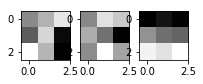

[Convolution Layer 2]
(3, 3, 3)
(3, 3, 3)
(3, 3, 3)


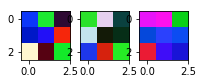

In [16]:
n.draw_filters(figsize=(20, 5))

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


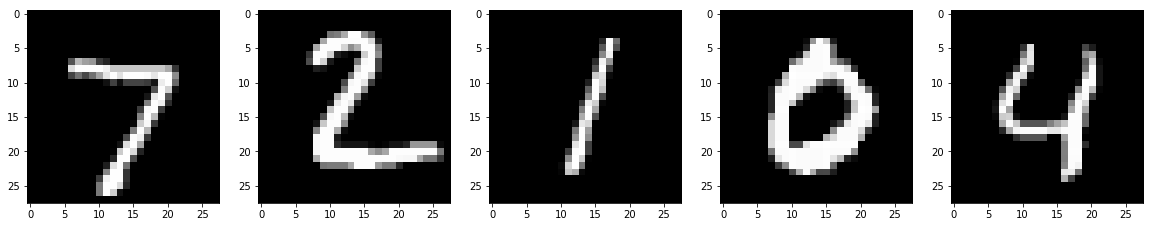

[Convolution Layer: conv0]
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)


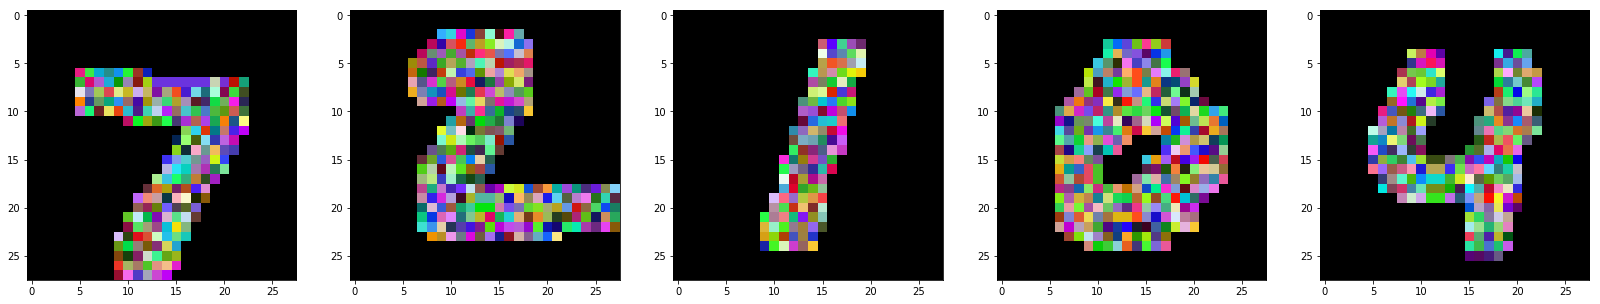

[Activation Layer: activation0]
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)


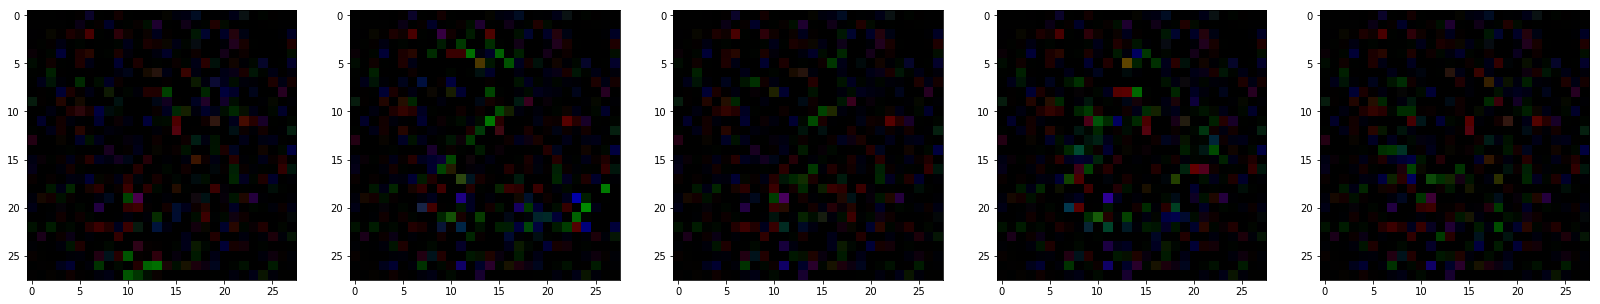

[Pooling Layer: pooling1]
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)


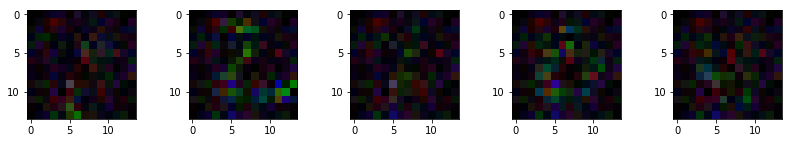

[Convolution Layer: conv2]
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)


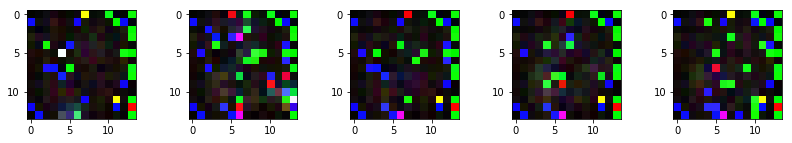

[Activation Layer: activation2]
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)


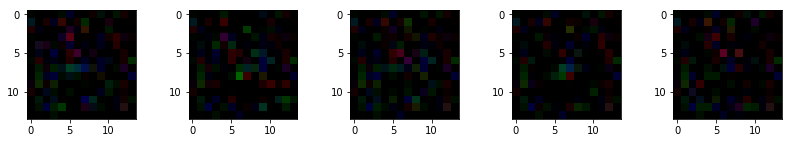

[Pooling Layer: pooling3]
(7, 7, 3)
(7, 7, 3)
(7, 7, 3)
(7, 7, 3)
(7, 7, 3)


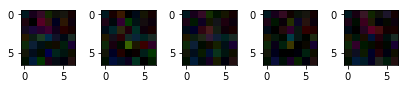

[Pooling Layer: reshape]
(1, 147)
(1, 147)
(1, 147)
(1, 147)
(1, 147)


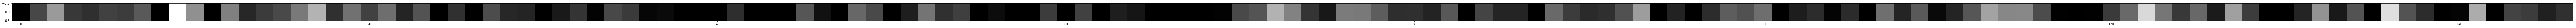

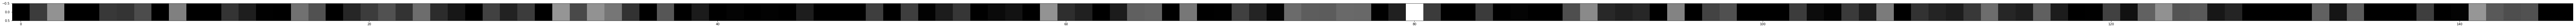

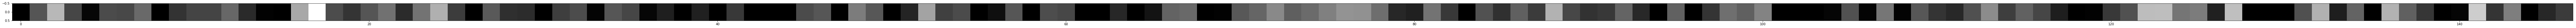

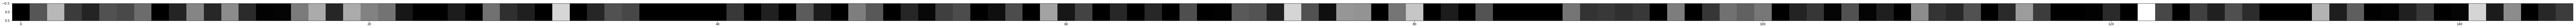

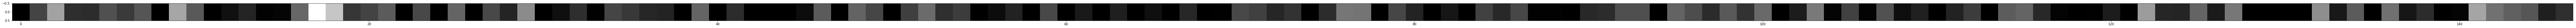

[Affine Layer: affine4]
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)


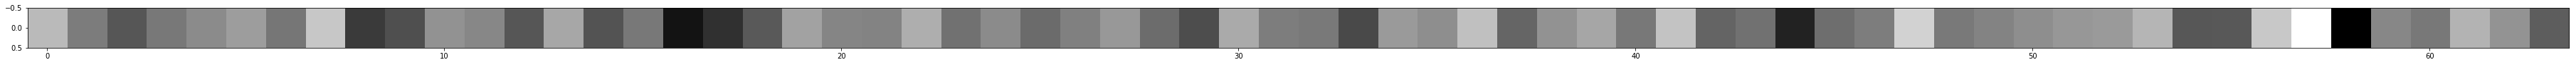

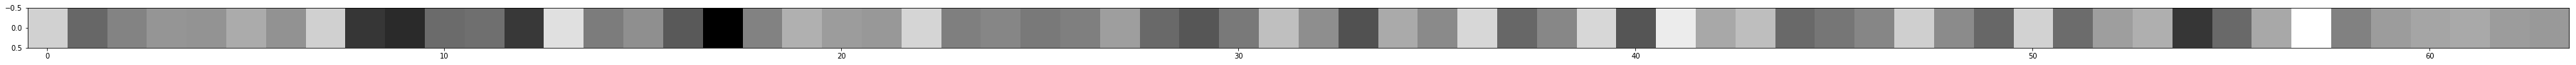

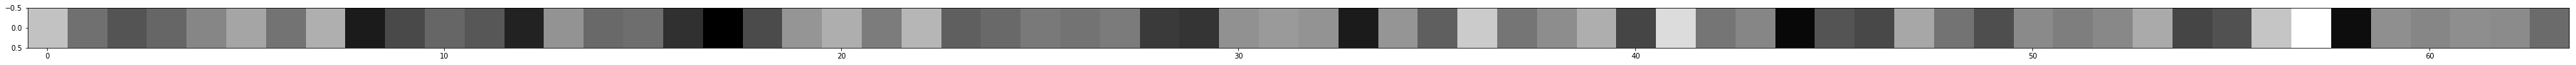

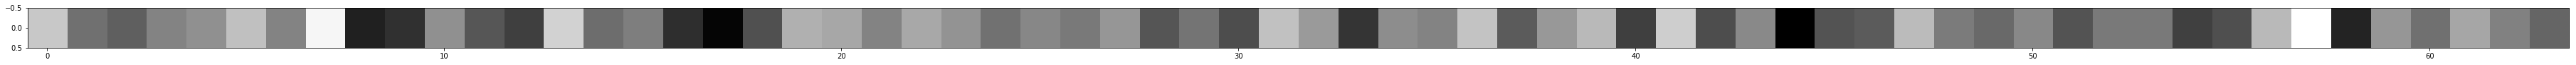

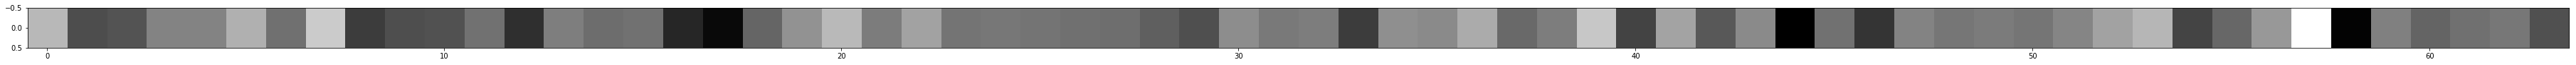

[Affine Layer: affine5]
(1, 10)
(1, 10)
(1, 10)
(1, 10)
(1, 10)


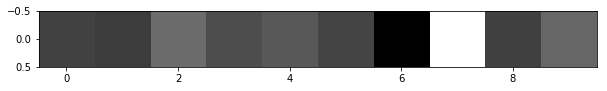

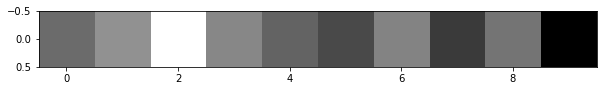

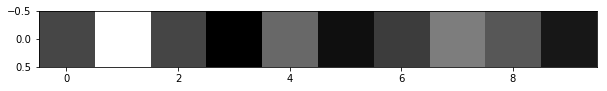

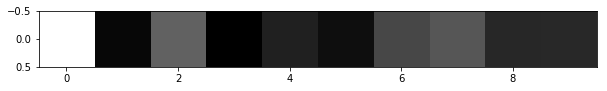

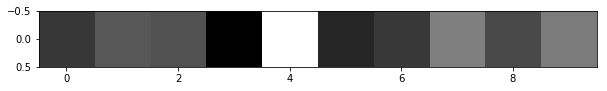

[Softmax Layer]
(1, 10) : [[  2.657e-12   1.235e-12   8.814e-10   1.337e-11   6.253e-11   3.525e-12
    2.307e-16   1.000e+00   2.127e-12   4.000e-10]]
(1, 10) : [[  1.964e-09   3.600e-07   1.000e+00   8.601e-08   6.505e-10   2.190e-11
    6.287e-08   2.901e-12   7.261e-09   1.045e-15]]
(1, 10) : [[  6.811e-06   9.997e-01   6.633e-06   7.701e-08   6.087e-05   2.089e-07
    4.037e-06   2.381e-04   2.064e-05   3.468e-07]]
(1, 10) : [[  1.000e+00   5.754e-11   2.824e-07   2.695e-11   6.582e-10   1.069e-10
    2.393e-08   9.805e-08   1.198e-09   1.296e-09]]
(1, 10) : [[  3.270e-11   1.590e-09   9.066e-10   4.322e-14   1.000e+00   4.384e-12
    4.358e-11   2.035e-07   2.673e-10   1.264e-07]]


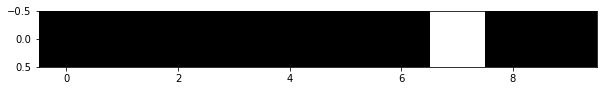

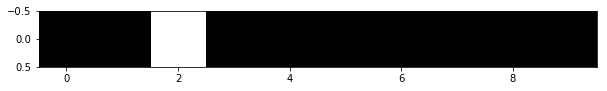

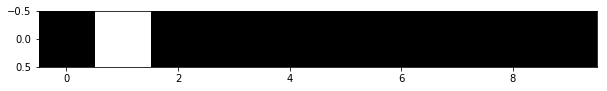

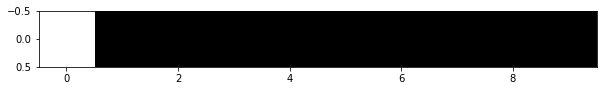

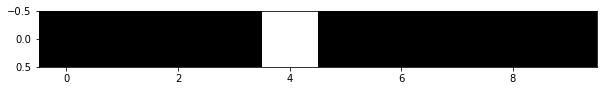

In [17]:
n.draw_filtered_images(test_inputs=data.test_input[:5], figsize=(20, 5))

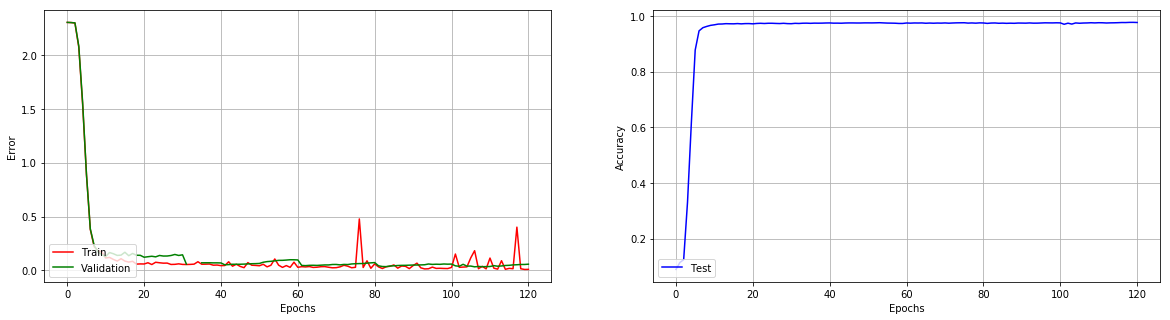

In [18]:
n.draw_error_values_and_accuracy(figsize=(20, 5))

False Prediction Index: 92, Prediction: Four, Ground Truth: Nine
False Prediction Index: 171, Prediction: Nine, Ground Truth: Seven
False Prediction Index: 247, Prediction: Two, Ground Truth: Four
False Prediction Index: 321, Prediction: Seven, Ground Truth: Two
False Prediction Index: 340, Prediction: Three, Ground Truth: Five


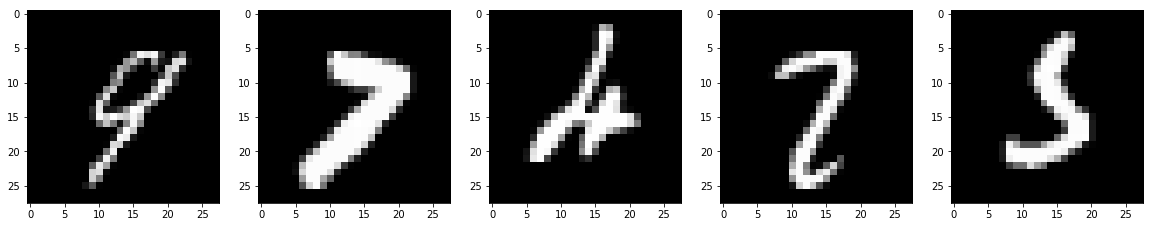

In [19]:
n.draw_false_prediction(data.test_input, data.test_target, data.labels, num=5, figsize=(20, 5))

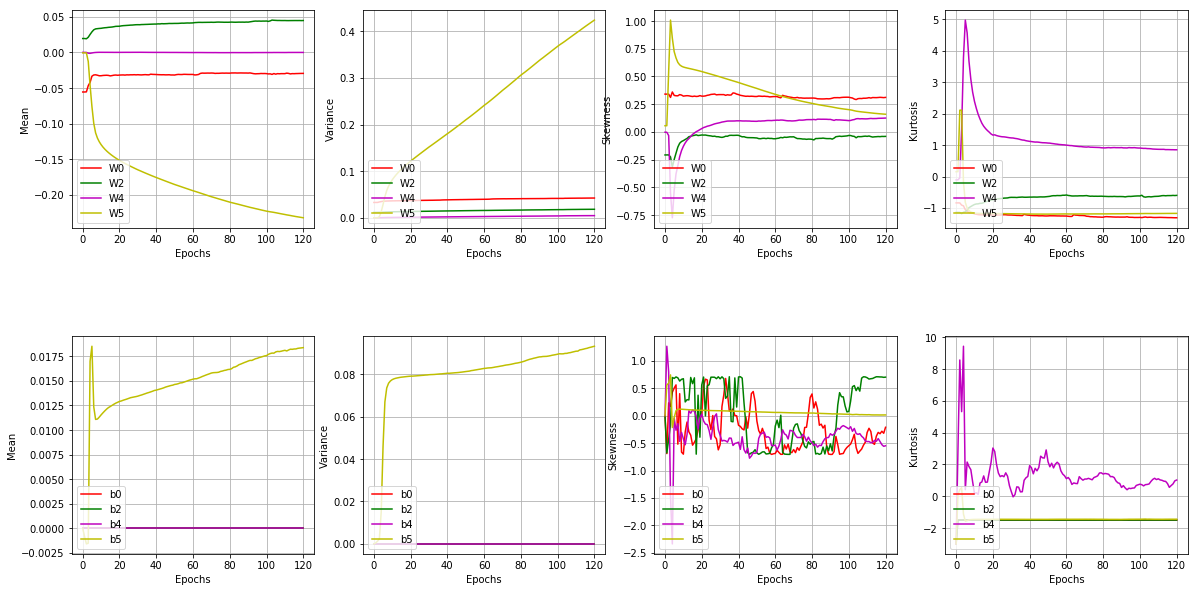

In [20]:
n.draw_param_description(figsize=(20, 10))

[conv0]
[batch_normal0]
[activation0]
[pooling1]
[conv2]
[batch_normal2]
[activation2]
[pooling3]
[reshape]
[affine4]
[batch_normal4]
[activation4]
[affine5]


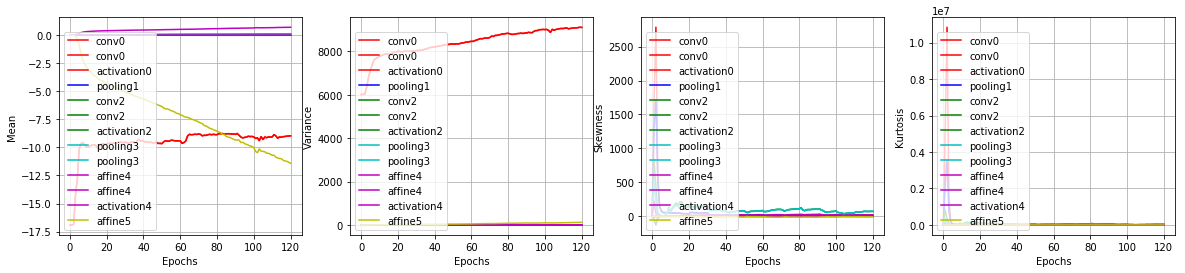

In [21]:
n.draw_output_description(figsize=(20, 10))